In [16]:
# import necessary libraries
import pandas as pd                                                         # for data readinga and manipulation
import numpy as np                                                          # for data readinga and manipulation
import matplotlib.pyplot as plt                                             # for plotting data
from sklearn.metrics import f1_score,accuracy_score                         # for accuracy
from sklearn.decomposition import PCA                                       # for dimensionality reduction
from hmmlearn import hmm                                                    # solving problem using Hidden Markov Model

In [17]:
# read the train data
train_data = pd.read_csv('train.csv')

# read the test data
test_data = pd.read_csv('test.csv')

In [20]:
# remove walking up and down data from train data
walk_up = train_data[train_data['Activity']=='WALKING_UPSTAIRS']
walk_down = train_data[train_data['Activity']=='WALKING_DOWNSTAIRS']
train_data = train_data.drop(walk_up.index, axis=0)
train_data = train_data.drop(walk_down.index, axis=0)
train_data.dropna(inplace=True)
train_data.reset_index(drop=True)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,0.368741,-0.037037,-0.171345,-0.289275,-0.112248,-0.012563,-0.318009,-0.100526,-0.005713,-0.017236,...,-0.299563,-0.441337,-0.035316,0.519782,0.262583,-0.898166,0.166580,0.000164,30,WALKING
5289,0.283921,-0.026589,-0.119525,-0.275639,-0.082424,-0.067783,-0.319503,-0.073029,-0.072464,0.021704,...,-0.608658,-0.172714,0.598862,0.391946,0.118377,-0.896800,0.168436,0.004581,30,WALKING
5290,0.208795,-0.011955,-0.070286,-0.255750,-0.143239,-0.136999,-0.316191,-0.146158,-0.151520,0.021704,...,-0.337544,0.541563,0.722410,0.438473,0.186591,-0.892379,0.171724,0.005806,30,WALKING
5291,0.207863,-0.019810,-0.051942,-0.278117,-0.136085,-0.082025,-0.334822,-0.154721,-0.079207,-0.148386,...,-0.262697,0.402823,-0.533675,-0.172064,-0.451897,-0.887386,0.174095,-0.000384,30,WALKING


In [21]:
# remove walking up and down data from test data
walk_up = test_data[test_data['Activity']=='WALKING_UPSTAIRS']
walk_down = test_data[test_data['Activity']=='WALKING_DOWNSTAIRS']
test_data.drop(walk_up.index, axis=0, inplace=True)
test_data.drop(walk_down.index, axis=0, inplace=True)
test_data.dropna(inplace=True)
test_data.reset_index(drop=True)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,0.199377,0.365598,0.076656,0.374991,-0.145443,-0.817014,0.172039,0.125107,24,WALKING
2052,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.187534,0.947383,-0.338707,-0.806335,0.352414,-0.822527,0.170455,0.121438,24,WALKING
2053,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.576973,0.211248,-0.708733,0.271323,-0.529599,-0.819168,0.175519,0.120376,24,WALKING
2054,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.313433,0.071932,-0.594592,0.482462,0.103639,-0.809132,0.180466,0.125399,24,WALKING


In [4]:
# train_data
# test_data

# ___________________________________________________________________________________________________________________checkpoint

In [22]:
data = train_data.iloc[:,0:561].values                                      # get values for different columns 
# print(data.shape)

cov_data = np.cov(data, rowvar=False)                                       # find covariance
print(np.linalg.det(cov_data))                                              # determinant of covariance is zero for independent data

0.0


In [25]:
# perform dimensionality reduction to remove data with less information using PCA (Principal Component Analysis)
dim_reduce_pca = PCA(n_components=100) 
cov_pca = dim_reduce_pca.fit(train_data.iloc[:,0:561].values)

In [26]:
data_train_pca=cov_pca.transform(train_data.iloc[:,0:561].values)
df_train_red=pd.DataFrame(data_train_pca)
# print(data_train_pca) 

# ___________________________________________________________________________________________________________________checkpoint

In [27]:
df_train_red['Subject']=train_data['subject']
df_train_red['Activity']=train_data['Activity']

In [61]:
# df_train_red.tail()
df_train_red = df_train_red.sample(frac=1).reset_index(drop=True)
df_train_red.dropna(inplace=True)
df_train_red

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,Subject,Activity
0,-3.692645,2.177494,-2.434721,-1.017965,-0.489396,0.643372,0.362343,-0.598439,0.099020,0.221861,...,-0.117924,-0.314224,0.197307,0.046217,-0.158597,-0.031477,-0.079495,-0.275629,15.0,WALKING
1,5.829131,-0.049044,1.377018,-0.217871,0.381859,-1.031769,-1.021396,-0.335992,0.064418,-0.079669,...,-0.085236,-0.235823,0.154609,-0.062158,-0.214182,0.083079,0.054502,0.134557,7.0,WALKING
2,-3.459662,2.344078,-1.053393,-0.414289,-0.208858,-0.244360,0.281390,-0.333575,-0.320410,0.777530,...,0.083001,-0.015417,0.131639,0.118241,-0.208230,0.045902,-0.052567,0.008020,25.0,SITTING
3,-2.980031,-2.111485,-0.233453,-0.257214,-0.535584,0.465738,-0.014967,-0.267136,-0.320254,0.230381,...,0.019563,-0.117092,0.033261,0.041932,0.113673,0.094379,-0.108176,-0.112185,19.0,SITTING
4,-0.865163,-2.071792,1.466931,-1.323181,-0.784846,0.834703,-0.502084,-0.105966,0.124045,-0.724355,...,-0.106496,0.101509,0.235262,-0.017569,-0.048008,0.140793,0.081506,0.155959,16.0,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,-2.568806,-1.117489,0.627732,-0.257881,-0.011520,-1.362110,0.612553,0.502644,0.497496,0.480364,...,0.053551,-0.116445,-0.041119,0.169033,-0.003094,-0.212904,-0.228146,0.011668,3.0,LAYING
3809,8.242563,-0.179321,-0.630862,-0.613354,-0.093430,-0.019685,-0.697600,-0.675671,0.228250,0.076356,...,0.147483,0.032109,-0.037169,-0.101559,-0.067885,-0.091079,0.003144,0.072152,3.0,WALKING
3810,0.160694,-1.643835,0.380617,-0.468295,0.842606,-0.646645,0.263533,-0.596696,1.512006,-0.744277,...,-0.138614,-0.204843,-0.160181,0.153644,-0.066612,0.048500,-0.055858,-0.146496,25.0,WALKING
3811,-0.683664,-1.152844,3.719738,0.772551,-1.600500,1.474060,-0.720741,-0.955868,0.647621,0.856873,...,-0.222025,-0.095627,-0.045300,-0.258125,0.216909,-0.454427,-0.234698,-0.107255,8.0,STANDING


In [62]:
df_train_red_STAND=df_train_red[df_train_red['Activity']=='STANDING']
df_train_red_SIT=df_train_red[df_train_red['Activity']=='SITTING']
df_train_red_LAY=df_train_red[df_train_red['Activity']=='LAYING']
df_train_red_WALK=df_train_red[df_train_red['Activity']=='WALKING']

print(df_train_red_STAND.shape)
print(df_train_red_SIT.shape)
print(df_train_red_LAY.shape)
print(df_train_red_WALK.shape)

(1002, 102)
(913, 102)
(998, 102)
(900, 102)


In [63]:
test_data.dropna(axis=0,inplace=True)

In [64]:
data_test_red=cov_pca.transform(test_data.iloc[:,0:561].values)
df_test_red=pd.DataFrame(data_test_red)

In [65]:
df_test_red['Subject']=test_data['subject']
df_test_red['Activity']=test_data['Activity']
df_test_red.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,Subject,Activity
0,-0.080102,-0.710527,1.299293,-0.598329,-0.029196,-0.872009,0.742174,0.454592,1.908429,1.446198,...,-0.297630,0.268343,-0.107591,-0.413860,-0.046526,0.002751,0.199250,-0.199553,2.0,STANDING
1,-1.708258,-1.143554,0.929962,-0.765541,-0.102692,-1.115596,0.803015,0.050254,0.655643,0.504551,...,-0.110485,-0.130063,0.149722,0.290526,0.165706,0.239518,0.160738,-0.143033,2.0,STANDING
2,-2.402933,-1.646853,-0.297559,-0.430969,-0.093944,-0.404919,0.343064,-0.858637,0.162701,0.152375,...,0.098862,-0.035512,0.004806,0.260379,0.276393,0.192225,0.039526,-0.132087,2.0,STANDING
3,-2.551282,-1.824864,-0.183260,-0.238205,-0.930069,0.072912,0.061324,-0.577645,-0.642039,-0.203952,...,0.025024,0.077120,-0.040417,0.164755,0.181251,0.115985,-0.001755,-0.318446,2.0,STANDING
4,-2.482938,-1.913883,0.704677,-0.756056,-1.027013,0.502607,-0.106559,-0.619384,-1.089143,0.061329,...,-0.000838,-0.020729,0.051946,0.025683,0.251209,0.127298,-0.069080,-0.123775,2.0,STANDING


In [66]:
df_test_red

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,Subject,Activity
0,-0.080102,-0.710527,1.299293,-0.598329,-0.029196,-0.872009,0.742174,0.454592,1.908429,1.446198,...,-0.297630,0.268343,-0.107591,-0.413860,-0.046526,0.002751,0.199250,-0.199553,2.0,STANDING
1,-1.708258,-1.143554,0.929962,-0.765541,-0.102692,-1.115596,0.803015,0.050254,0.655643,0.504551,...,-0.110485,-0.130063,0.149722,0.290526,0.165706,0.239518,0.160738,-0.143033,2.0,STANDING
2,-2.402933,-1.646853,-0.297559,-0.430969,-0.093944,-0.404919,0.343064,-0.858637,0.162701,0.152375,...,0.098862,-0.035512,0.004806,0.260379,0.276393,0.192225,0.039526,-0.132087,2.0,STANDING
3,-2.551282,-1.824864,-0.183260,-0.238205,-0.930069,0.072912,0.061324,-0.577645,-0.642039,-0.203952,...,0.025024,0.077120,-0.040417,0.164755,0.181251,0.115985,-0.001755,-0.318446,2.0,STANDING
4,-2.482938,-1.913883,0.704677,-0.756056,-1.027013,0.502607,-0.106559,-0.619384,-1.089143,0.061329,...,-0.000838,-0.020729,0.051946,0.025683,0.251209,0.127298,-0.069080,-0.123775,2.0,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,7.131847,-0.270221,-0.041193,-0.925241,-0.333093,0.570122,0.472305,-0.832524,0.864580,-0.596589,...,0.187631,0.067180,-0.022304,0.100782,-0.140085,0.165323,0.111346,-0.076903,18.0,STANDING
2052,7.426155,-0.441636,-0.378807,-0.684773,0.261109,0.636681,0.522300,-0.783485,0.530157,-0.229363,...,-0.223027,0.112742,-0.080417,0.264459,-0.302122,0.098987,-0.095398,-0.138909,18.0,STANDING
2053,6.974592,-0.504622,0.075697,-0.538072,1.063760,-0.190164,0.579340,-0.465770,-0.114880,-0.500288,...,-0.138179,-0.049948,0.112164,0.119317,-0.419698,-0.214675,-0.111406,-0.048429,18.0,STANDING
2054,6.362945,-0.182723,1.036726,-0.969109,-0.596624,-0.333501,-0.134056,0.156786,0.424645,-0.149468,...,0.085944,-0.110291,0.107226,-0.008914,-0.273454,-0.157136,0.158514,0.101082,18.0,STANDING


In [77]:
#calculating true labels
labels_true=[]
count=0
df_test_red.dropna(inplace=True)
for i in range(df_test_red.shape[0]):
    if (df_test_red['Activity'].iloc[i]=='STANDING'):
        labels_true.append(0)
    elif (df_test_red['Activity'].iloc[i]=='SITTING'):
        labels_true.append(1)
    elif (df_test_red['Activity'].iloc[i]=='LAYING'):
        labels_true.append(2)   
    elif (df_test_red['Activity'].iloc[i]=='WALKING'):
        labels_true.append(3)
    count+=1
labels_true=np.array(labels_true)           
labels_true.shape
# print(count)

(1431,)

In [68]:
#implementing hmm
#since there are 4 activity so fitting hmm for each activity
def HMM_F1score(N,M,labels_true):
    hmm_stand=hmm.GMMHMM(n_components=N,n_mix=M,covariance_type='diag')
    hmm_sit=hmm.GMMHMM(n_components=N,n_mix=M,covariance_type='diag')
    hmm_lay=hmm.GMMHMM(n_components=N,n_mix=M,covariance_type='diag')
    hmm_walk=hmm.GMMHMM(n_components=N,n_mix=M,covariance_type='diag')

    hmm_stand.fit(df_train_red_STAND.iloc[:,0:100].values)
    hmm_sit.fit(df_train_red_SIT.iloc[:,0:100].values)
    hmm_lay.fit(df_train_red_LAY.iloc[:,0:100].values)
    hmm_walk.fit(df_train_red_WALK.iloc[:,0:100].values)

   #calculating F1 score
    labels_predict = []
    for i in range(len(df_test_red)):
        log_likelihood_value = np.array([hmm_stand.score(df_test_red.iloc[i,0:100].values.reshape((1,100))),hmm_sit.score(df_test_red.iloc[i,0:100].values.reshape((1,100))),hmm_lay.score(df_test_red.iloc[i,0:100].values.reshape((1,100))),hmm_walk.score(df_test_red.iloc[i,0:100].values.reshape((1,100)))])
        labels_predict.append(np.argmax(log_likelihood_value))    
    labels_predict = np.array(labels_predict)  

    F1 = f1_score(labels_true,labels_predict,average='micro')
    acc = accuracy_score(labels_true,labels_predict)
    return F1,acc

In [80]:
states=np.arange(1,50,1)

HMM has been trained for num_states= 1
HMM has been trained for num_states= 2
HMM has been trained for num_states= 3
HMM has been trained for num_states= 4
HMM has been trained for num_states= 5
HMM has been trained for num_states= 6
HMM has been trained for num_states= 7
HMM has been trained for num_states= 8
HMM has been trained for num_states= 9
HMM has been trained for num_states= 10
HMM has been trained for num_states= 11
HMM has been trained for num_states= 12
HMM has been trained for num_states= 13
HMM has been trained for num_states= 14
HMM has been trained for num_states= 15
HMM has been trained for num_states= 16
HMM has been trained for num_states= 17
HMM has been trained for num_states= 18
HMM has been trained for num_states= 19
HMM has been trained for num_states= 20
HMM has been trained for num_states= 21
HMM has been trained for num_states= 22
HMM has been trained for num_states= 23
HMM has been trained for num_states= 24
HMM has been trained for num_states= 25
HMM has b

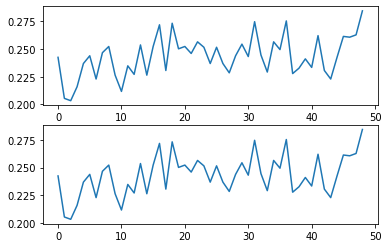

In [83]:
F1_value_states = []
acc_value_states = []
max_acc = (0, 0, 0)
for i in states:
    f1,acc = HMM_F1score(i,1,labels_true)
    if (f1, acc) > max_acc:
        max_acc = (f1, acc, i)
    print("HMM has been trained for num_states= {}".format(i))
    F1_value_states.append(f1)
    acc_value_states.append(acc)
fig,ax = plt.subplots(2,1)
print(max_acc)

ax[0].plot(F1_value_states)
ax[1].plot(acc_value_states)

plt.show()

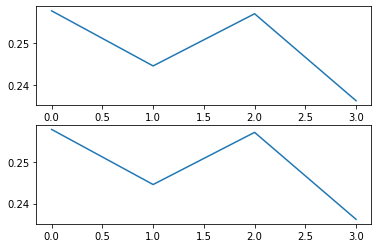

In [71]:
f_test = []
acc_test = []

for i in range(1,5):
    f1,acc1 = HMM_F1score(10,i,labels_true)
    f_test.append(f1)
    acc_test.append(acc1)
    
fig,ax = plt.subplots(2,1)

ax[0].plot(f_test)
ax[1].plot(acc_test)

plt.show()

In [72]:
f1_val,acc_val = HMM_F1score(10,8,labels_true)
print(f1_val)
print(acc_val)

0.24388539482879107
0.24388539482879107
